# Simple K- Means Clusting implementation using euclidean distances

In [1]:
import numpy as np
import pandas as pd

In [2]:
def euc_dist(a,b):
    return np.linalg.norm(a-b)


class KMeans:
    def __init__(self, k=5, tol=1e-6, max_iter=100, random_state=None):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.seed = random_state

    def fit(self,data):
        
        self.row_shape, self.col_shape = data.shape
        
        if self.seed is not None:
            np.random.seed(self.seed)

        #initiate random centroids
        self.centroids = {i:data[c,:] for i,c in enumerate(np.random.choice(self.row_shape, self.k))}
        
        for i in range(self.max_iter):
            self.classifications = {}

            for j in range(self.k):
                self.classifications[j] = []

            for row_i in range(self.row_shape):
                #compute distances to centroids
                distances = [euc_dist(data[row_i,:], self.centroids[c]) for c in self.centroids]
                #update classifications
                self.classifications[distances.index(min(distances))].append(data[row_i, :])

            prev_centroids = self.centroids
            for classification in self.classifications:
                #update centroids
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            #early stopping (if all change less than tolerance)
            if all([np.sum(np.abs(self.centroids[c]-prev_centroids[c]))/100 > self.tol for c in self.centroids]):
                break

        self.cluster_centers_ = pd.DataFrame(self.centroids).values.T
        self.labels_ = self.predict(data)

    def predict(self,data):
        predicted = []
        for row in data:
            distances = [euc_dist(row, self.centroids[c]) for c in self.centroids]
            predicted.append(distances.index(min(distances)))
        return np.array(predicted)
    
    def fit_predict(self, data):
        self.fit(data)
        return self.predict(data)

## Example Usage

### example taken from sklearn example

example taken and modified from scikit-learn
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

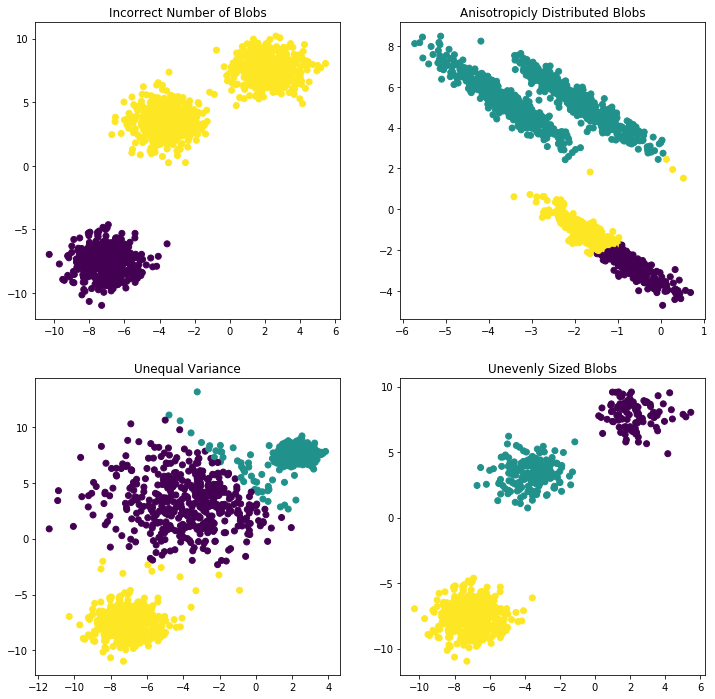

In [4]:

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 172
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:200], X[y == 2][:100]))
y_pred = KMeans(3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()
